In [1]:
! pip install pynini

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 MB 2.4 MB/s eta 0:00:00


Imports

In [5]:
import pynini
from pynini import Fst
from pynini.lib import pynutil, rewrite

Ordinals' maps


In [6]:
NumeralsDict = dict[str, str]

units: NumeralsDict = {
    "zero": "0", "jeden": "1", "dwa": "2", "trzy": "3", "cztery": "4",
    "pięć": "5", "sześć": "6", "siedem": "7", "osiem": "8", "dziewięć": "9"
}

teens: NumeralsDict = {
    "jedenaście": "11", "dwanaście": "12", "trzynaście": "13", "czternaście": "14",
    "piętnaście": "15", "szesnaście": "16", "siedemnaście": "17", "osiemnaście": "18", "dziewiętnaście": "19"
}

tens: NumeralsDict = {
    "dziesięć": "10", "dwadzieścia": "20", "trzydzieści": "30", "czterdzieści": "40",
    "pięćdziesiąt": "50", "sześćdziesiąt": "60", "siedemdziesiąt": "70", "osiemdziesiąt": "80", "dziewięćdziesiąt": "90"
}

hundreds: NumeralsDict = {
    "sto": "100", "dwieście": "200", "trzysta": "300", "czterysta": "400",
    "pięćset": "500", "sześćset": "600", "siedemset": "700", "osiemset": "800", "dziewięćset": "900"
}

FSTs for each group


In [63]:
units_fst: Fst = pynini.string_map(units.items())
teens_fst: Fst = pynini.string_map(teens.items())
tens_fst: Fst = pynini.string_map(tens.items())
hundreds_fst: Fst = pynini.string_map(hundreds.items())

numerals_fst: Fst = (
    hundreds_fst |
    tens_fst + pynutil.delete(" ") + units_fst |
    teens_fst |
    units_fst
)

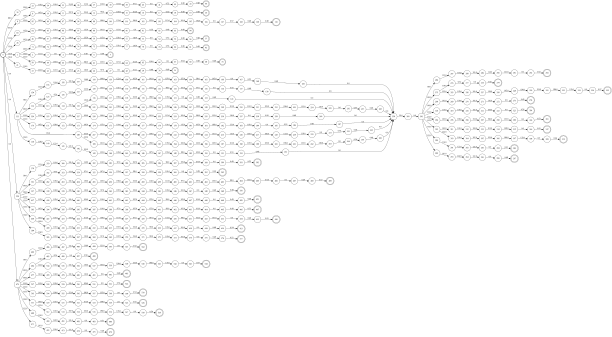

In [64]:
numerals_fst

In [65]:
numerals_fst.optimize().write("polish_numerals.fst")

Transducer

In [66]:
from typing import Union

def transduce_numeral(numeral: str, transducer: Fst) -> Union[str, None]:
  try:
    result: str = rewrite.one_top_rewrite(numeral, transducer)
    return result
  except rewrite.Error:
    return "Invalid numeral"

Tests


In [67]:
assert transduce_numeral("trzy", numerals_fst) == "3"

In [68]:
print(transduce_numeral("siedemdziesiąt jeden", numerals_fst))

701
